ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Index(['ADM0_A3', 'geometry', 'CONTINENT', 'SUBREGION'], dtype='object')


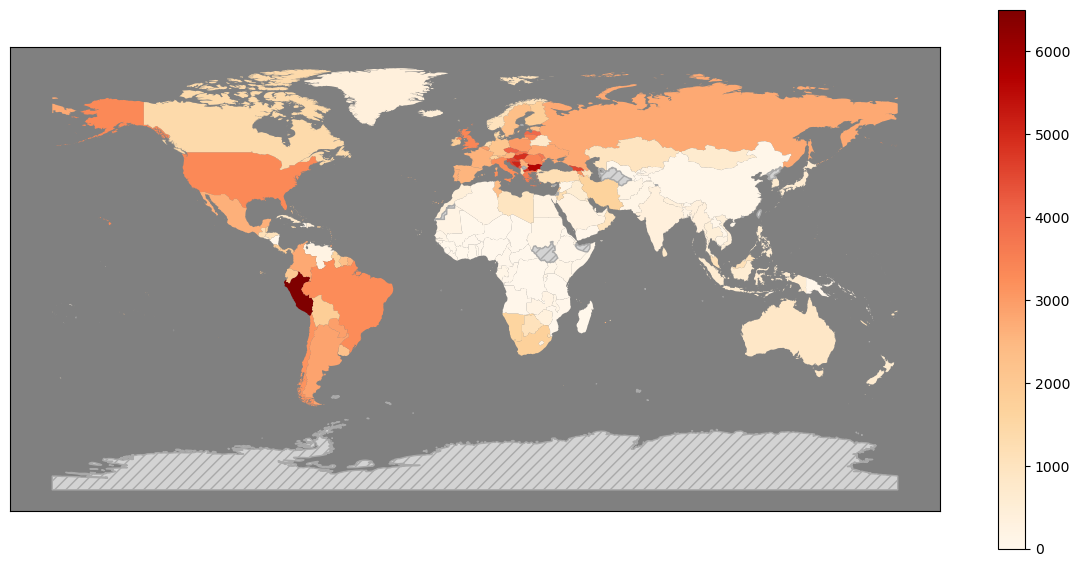

In [1]:
import os
import geopandas
import pandas
import matplotlib.pyplot as plt

shapefile = r"map/ne_50m_admin_0_countries.shp"
gdf = geopandas.read_file(shapefile)[
    ["ADM0_A3", "geometry", "CONTINENT", "SUBREGION"]]
print(gdf.columns)
gdf.columns = ["country_code", "geometry", "continent", "region"]

total_covid_data = pandas.read_csv(
    "owid-covid-data.csv")
covid_data = total_covid_data[total_covid_data['date'] == '2023-08-02']

merged = gdf.merge(
    covid_data, left_on="country_code", right_on="iso_code", how="left")

vmin, vmax = 0,6500
fig, ax = plt.subplots(1, figsize=(15, 7))
p = merged.plot(column="total_deaths_per_million",legend=True,ax=ax,cmap="OrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax),missing_kwds={"color": "lightgrey","edgecolor": "darkgrey","hatch": "///","label": "Missing values",})
p.set_facecolor("gray")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#plt.savefig("world_deaths.jpg", bbox_inches="tight", dpi=300)


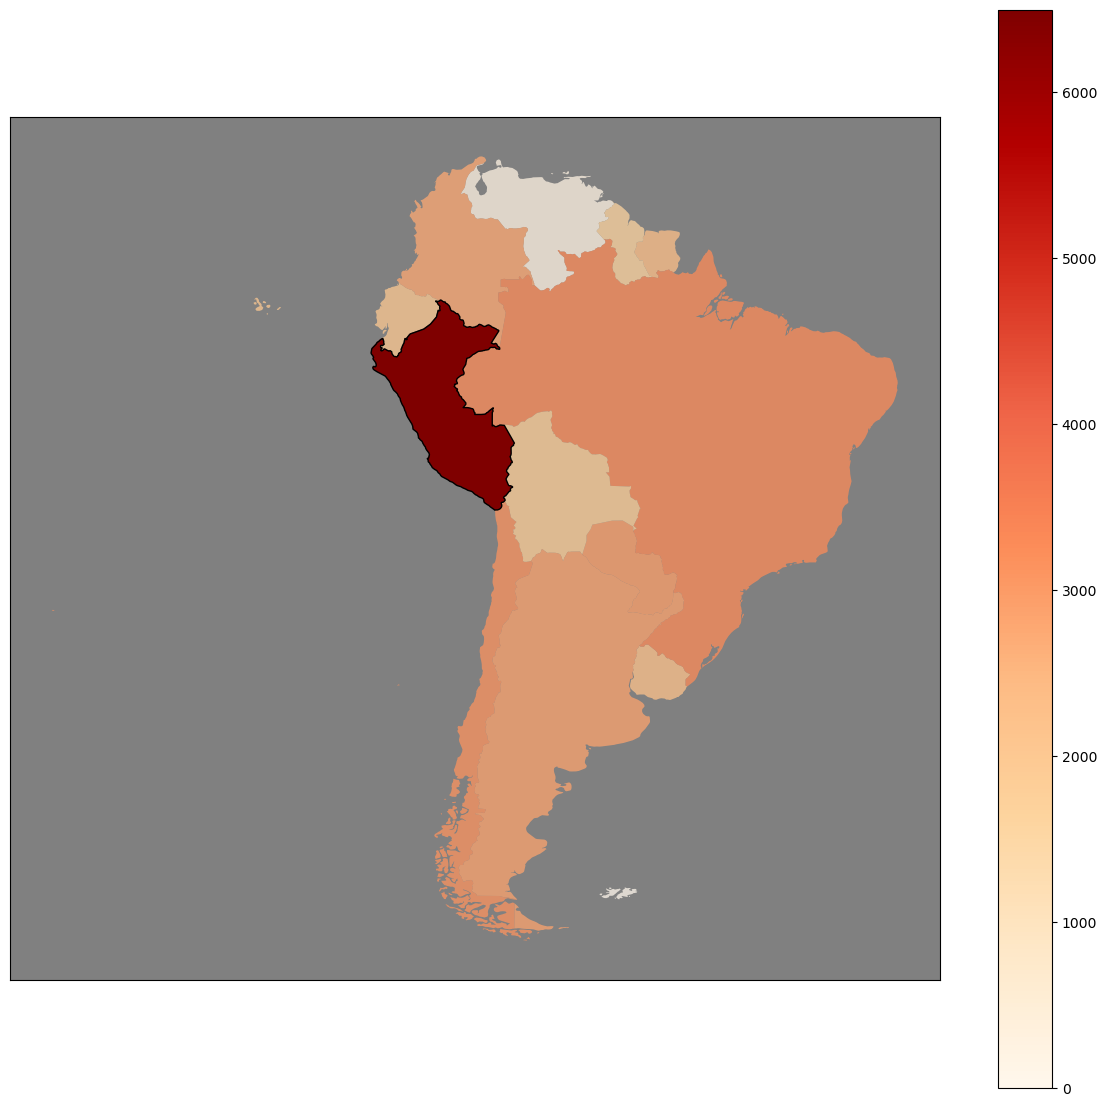

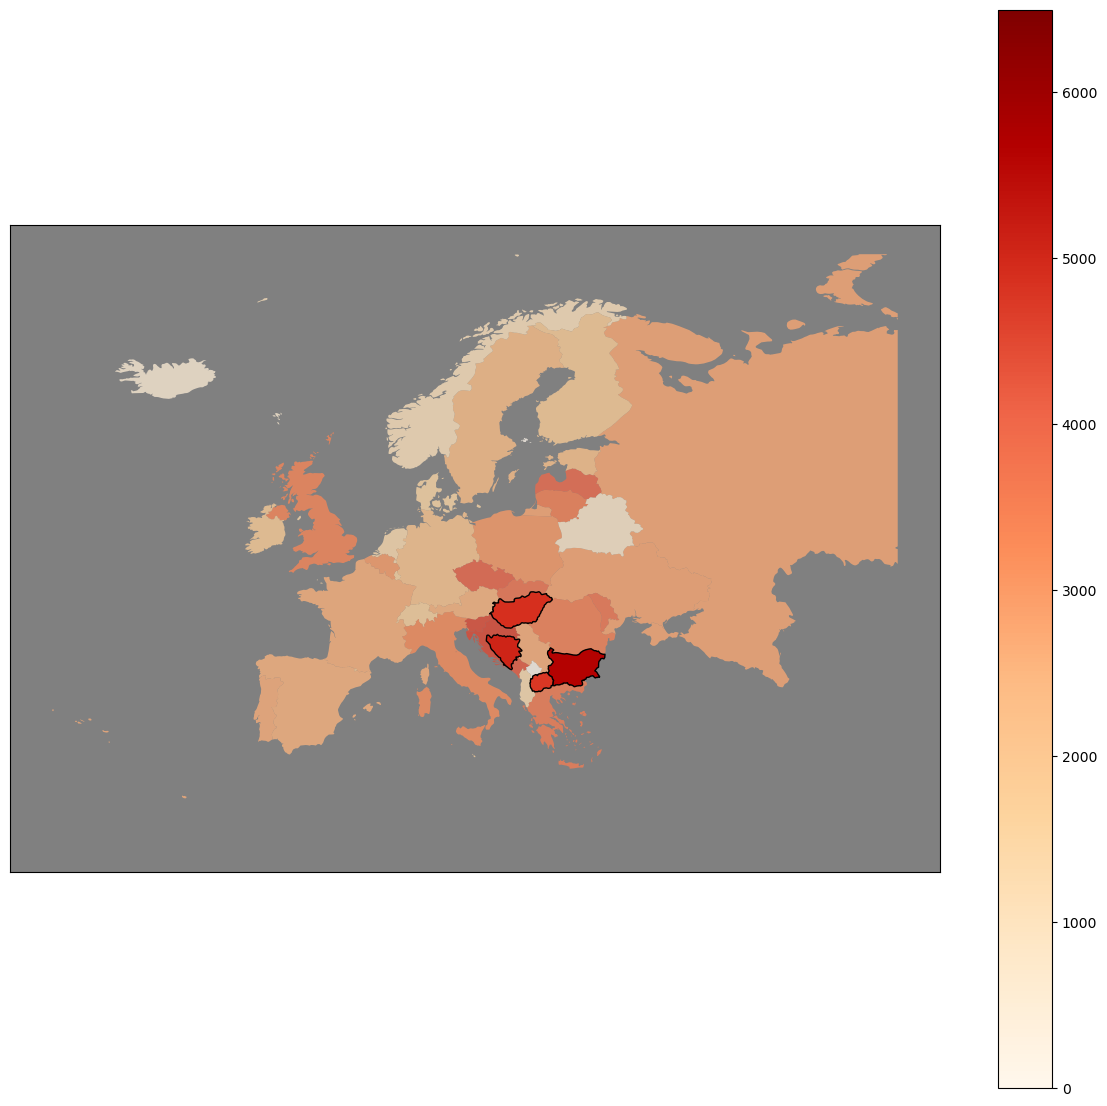

In [6]:
merged["total_deaths_per_million"] = merged["total_deaths_per_million"].fillna(0)

top_merged = merged.sort_values(by = 'total_deaths_per_million', ascending = False).head(5)



from shapely.geometry import Polygon

def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox_gdf = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

europe = merged[merged.continent_x == 'Europe'].overlay(bbox_gdf, how="intersection")

fig, ax = plt.subplots(1,1, figsize=(15, 14))

ax = merged[merged.continent_x == 'South America'].plot(column="total_deaths_per_million",legend=True,ax=ax,cmap="OrRd", alpha = 0.75, norm=plt.Normalize(vmin=vmin, vmax=vmax),missing_kwds={"color": "lightgrey","edgecolor": "darkgrey","hatch": "///","label": "Missing values",})
top_merged[top_merged.continent_x == 'South America'].plot(column="total_deaths_per_million",ax=ax,cmap="OrRd", edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)


ax.set_facecolor("gray")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()
#plt.savefig("sam_top_highlighted.jpg", bbox_inches="tight", dpi=300)
fig, ax = plt.subplots(1,1, figsize=(15, 14))

ax = europe.plot(column="total_deaths_per_million",legend=True,ax=ax,cmap="OrRd", alpha = 0.75, norm=plt.Normalize(vmin=vmin, vmax=vmax),missing_kwds={"color": "lightgrey","edgecolor": "darkgrey","hatch": "///","label": "Missing values",})

top_merged[top_merged.continent_x == 'Europe'].plot(column="total_deaths_per_million",ax=ax,cmap="OrRd", edgecolor = 'black',norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.set_facecolor("gray")

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()
#plt.savefig("eu_top_highlighted.jpg", bbox_inches="tight", dpi=300)


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


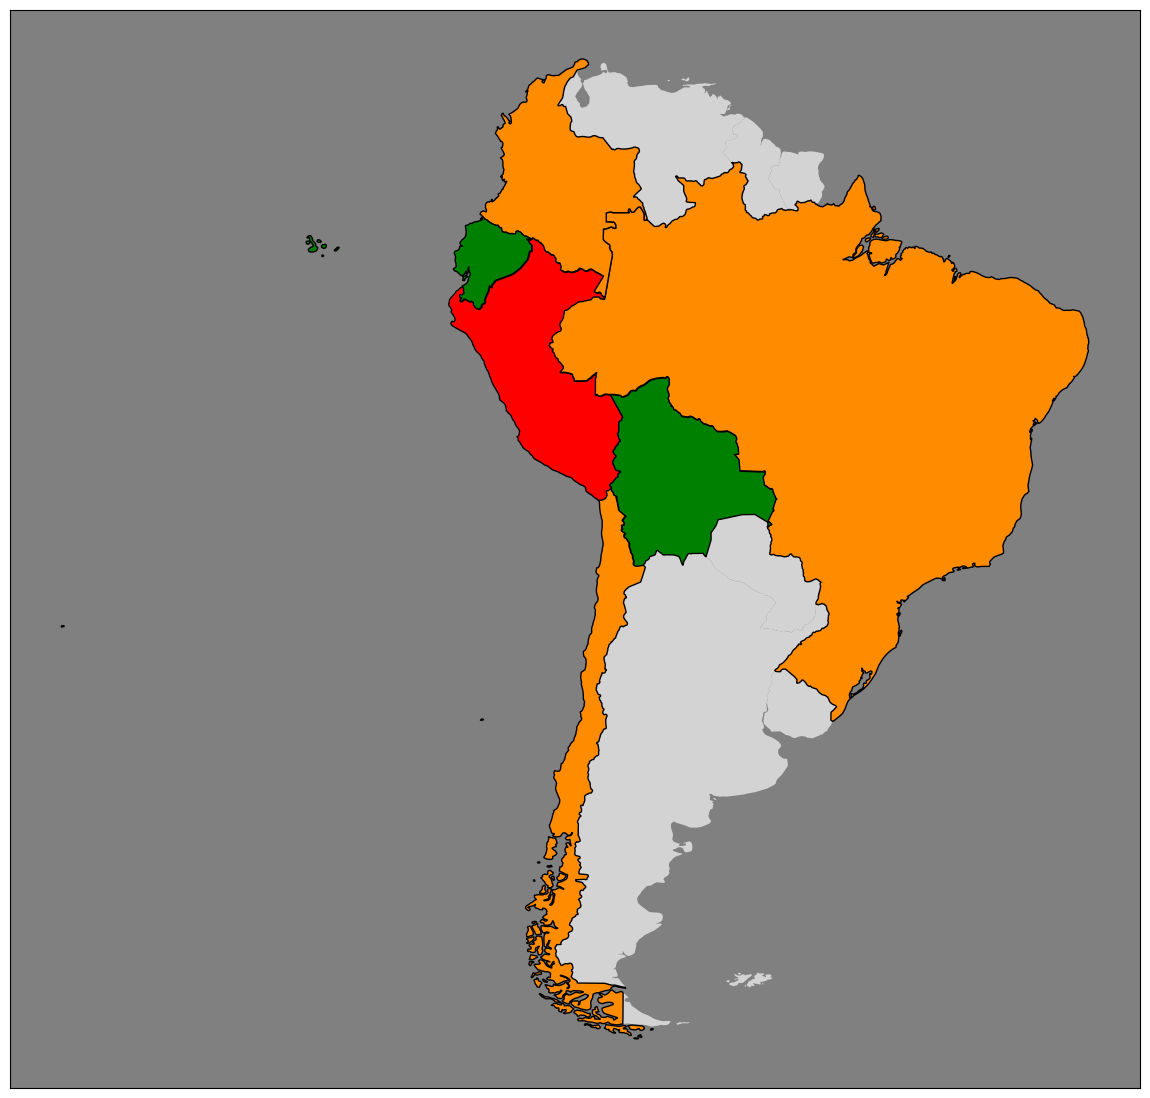

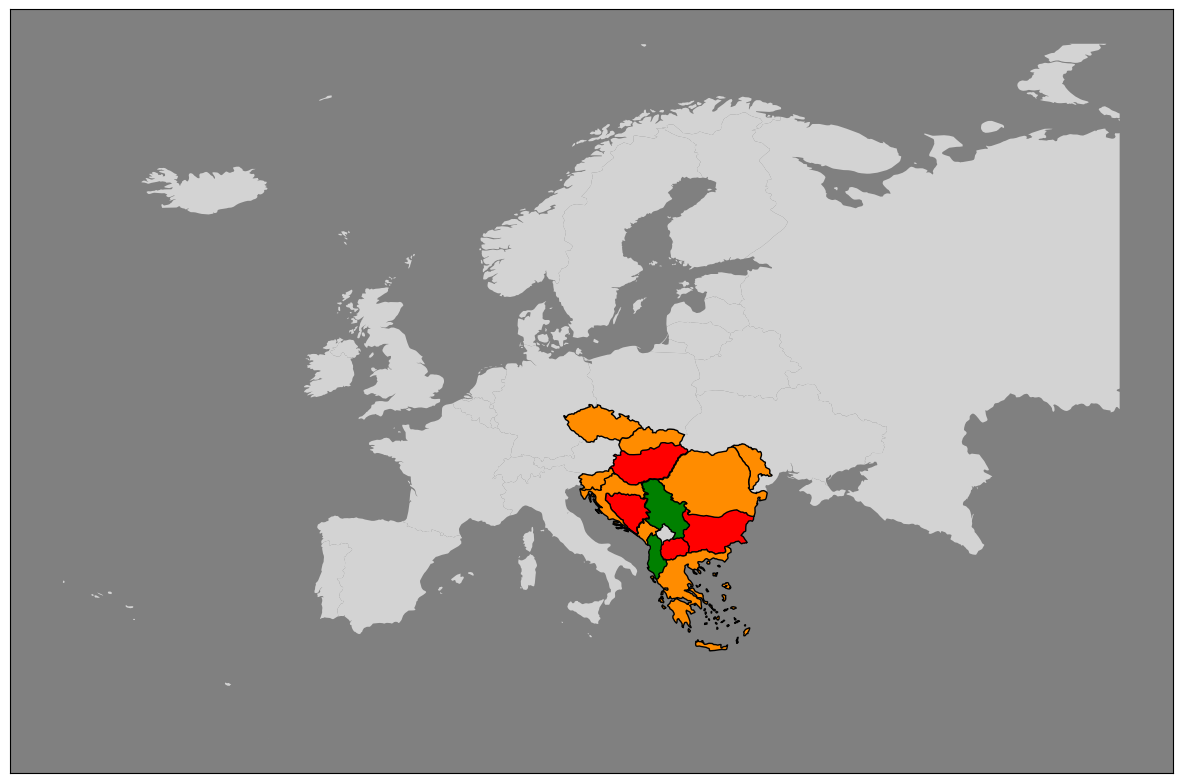

In [8]:

from shapely.geometry import Polygon

def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])


bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)


bbox_gdf = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])


europe = merged[merged.continent_x == 'Europe'].overlay(bbox_gdf, how="intersection")


fig, ax = plt.subplots(1,1, figsize=(15, 14))

ax = merged[merged.continent_x == 'South America'].plot(color = 'lightgrey', ax = ax)

top_merged[top_merged.continent_x == 'South America'].plot(ax=ax,color = 'red', edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)
sam_mid = ['CHL','BRA', 'COL']
sam_low = ['ECU','BOL']
for iso in sam_mid:
    merged[merged.country_code == iso].plot(ax=ax,color='darkorange', edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)
for iso in sam_low:
    merged[merged.country_code == iso].plot(ax=ax,color='green', edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)



ax.set_facecolor("grey")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

#plt.savefig("sam_classes.jpg", bbox_inches="tight", dpi=300)


fig, ax = plt.subplots(1,1, figsize=(15, 14))

#ax[1] = europe.plot(column="total_deaths_per_million",legend=True,ax=ax[1],cmap="OrRd", alpha = 0.75, norm=plt.Normalize(vmin=vmin, vmax=vmax),missing_kwds={"color": "lightgrey","edgecolor": "darkgrey","hatch": "///","label": "Missing values",})
ax = europe.plot(color = 'lightgrey', ax = ax)
top_merged[top_merged.continent_x == 'Europe'].plot(column="total_deaths_per_million",ax=ax,color = 'red', edgecolor = 'black',norm=plt.Normalize(vmin=vmin, vmax=vmax))

eu_mid = ['HRV','SVN','CZE','SVK','MDA','GRC','ROU','MNE']
eu_low = ['SRB','ALB']

for iso in eu_mid:
    europe[europe.country_code == iso].plot(ax=ax,color='darkorange', edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)
for iso in eu_low:
    europe[europe.country_code == iso].plot(ax=ax,color='green', edgecolor = 'black', norm=plt.Normalize(vmin=vmin, vmax=vmax),)


ax.set_facecolor("grey")

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#plt.savefig("eu_classes.jpg", bbox_inches="tight", dpi=300)


In [9]:
dates = total_covid_data['date'].unique()
weeks = []
for idx, date in enumerate(dates):
    if idx%7 == 0:
        weeks.append(date)
weeks.remove('2020-01-02')

In [10]:
months = []
for idx, date in enumerate(dates):
    if '01' == date[-2:]:
        months.append(date)
months.sort()

In [ ]:
## creates many images (one for every month/week) and saves them in a folder, if folder exists. can be converted to gif

time = weeks
vmin, vmax = 0,2000

for dat in time[:]:
    covid_data = total_covid_data[total_covid_data['date'] == dat]
    merged = gdf.merge(covid_data, left_on="country_code", right_on="iso_code", how="left")

    merged["new_cases_smoothed_per_million"] = merged["new_cases_smoothed_per_million"].fillna(0)

    fig, ax = plt.subplots(1, figsize=(15, 7))
    p = merged.plot(column="new_cases_smoothed_per_million",legend=True,ax=ax,cmap="OrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))#scheme="FisherJenks",legend_kwds={"loc": "lower left","title": "new cases per million",},)

    p.set_facecolor("gray")

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    year_month = dat  
    ax.set_title('new cases per million \n' +year_month, fontsize = 15)
    ax.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    #print(year_month)
    #p.annotate(year_month,
    #        xy=(0.6, .19), xycoords='figure fraction',
    #        horizontalalignment='left', verticalalignment='top',
    #        fontsize=25)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    #filepath = os.path.join(output_path, only_year+'_violence.jpg')
    #chart = fig.get_figure()
    #chart.savefig(filepath, dpi=300)
    #plt.savefig("gif/new_cases/new_cases_per_million_"+str(dat)+".jpg", bbox_inches="tight", dpi=300)
    plt.close()